# PSYN Simon Coupermant et Anthony Lwin

## 1) Importation des bibliothèques nécessaires


In [1]:
import pandas as pd  # Manipulation de données
import numpy as np  # Calculs numériques
import matplotlib.pyplot as plt  # Visualisation de données
import seaborn as sns  # Visualisation avancée

# Importation des bibliothèques de scikit-learn pour la modélisation
from sklearn.model_selection import train_test_split  # Division des données en ensembles d'entraînement et de test
from sklearn.ensemble import RandomForestClassifier  # Modèle de classification Random Forest
from sklearn.linear_model import LinearRegression  # Modèle de régression linéaire
from sklearn.pipeline import make_pipeline  # Construction de pipelines pour le prétraitement et les modèles
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # Normalisation et transformation polynomiale
from sklearn.decomposition import PCA  # Réduction de dimension avec PCA
from sklearn.metrics import accuracy_score, classification_report   # Évaluation des modèles
# Import des outils de scikit-learn nécessaires
from sklearn.model_selection import GridSearchCV  # Optimisation des hyperparamètres
from sklearn.metrics import roc_auc_score, roc_curve  # Évaluation avec AUC-ROC
from sklearn.model_selection import cross_val_score  # Validation croisée

In [2]:
from sklearn.metrics import mean_squared_error

## 2 Acquisition des données et Exploration des données

In [3]:
# Define data path and folder
path_phone = "C:/Users/scoup/Downloads/arrow_data_psyn.csv"
df = pd.read_csv(path_phone, on_bad_lines='skip')

In [4]:
df.shape # Dimension du jeu de données

(7580, 16)

In [5]:
df.head() # Affichage des premières lignes

,Reference ZENER,Stock,Fabricant,Type,Configuration,0minal Zener Voltage (V),Zener volatge tolerance,Maximum power dissipation (MW),Test Current (MA),Maximum reverse leaking current (UA),Maximum regulator current (MA),Maximum Zener impedance (OHM),Maximum power dissipation (MW,Packaging,Pin Count,SVHC
0,TZMC1V0-GS08 Zener Diode S1 0.75V 7% 8Ohm 500m...,NaN,18,V,S1,0.75,7%,500.0,5.00,NaN,NaN,8,500.0,7.0,2.0,0.0
1,TZMC1V0-M-08 Zener Diode S1 0.75V 7% 8Ohm 500m...,NaN,18,V,S1,0.75,7%,500.0,5.00,NaN,NaN,8(Typ),500.0,7.0,2.0,0.0
2,BZX8850S-C1V8YL Zener Diode S1 1.8V 5% 100Ohm ...,NaN,11,V,S1,1.80,5%,365.0,0.05,7.5,NaN,100,365.0,7.0,2.0,1.0
3,JANS1N4614DUR-1 Diode Zener S1 1.8V 1% 500mW 2...,NaN,10,V,S1,1.80,1%,500.0,0.25,3.5,120,1200,NaN,NaN,2.0,NaN
4,JANTX1N4614 (DO35) Zener Diode S1 1.8V 5% 1200...,NaN,10,V,S1,1.80,5%,400.0,0.25,7.5,120,1200,400.0,2.0,2.0,1.0


In [6]:
print("\nInformations sur le DataFrame :")
print(df.info())


Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7580 entries, 0 to 7579
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Reference ZENER                       7580 non-null   object 
 1   Stock                                 222 non-null    object 
 2   Fabricant                             7580 non-null   int64  
 3   Type                                  7379 non-null   object 
 4   Configuration                         7380 non-null   object 
 5   0minal Zener Voltage (V)              7392 non-null   float64
 6   Zener volatge tolerance               7373 non-null   object 
 7   Maximum power dissipation (MW)        7391 non-null   float64
 8   Test Current (MA)                     7373 non-null   float64
 9   Maximum reverse leaking current (UA)  7222 non-null   float64
 10  Maximum regulator current (MA)        2096 non-null

In [7]:
print("\nStatistiques descriptives :")
print(df.describe(include='all'))


Statistiques descriptives :
                                          Reference ZENER Stock    Fabricant  \
count                                                7580   222  7580.000000   
unique                                               4569    93          NaN   
top     1N5386B Zener Diode S1 180V 5% 430Ohm 5000mW 2...     1          NaN   
freq                                                   21    22          NaN   
mean                                                  NaN   NaN    12.725330   
std                                                   NaN   NaN     5.393405   
min                                                   NaN   NaN     1.000000   
25%                                                   NaN   NaN     9.000000   
50%                                                   NaN   NaN    13.000000   
75%                                                   NaN   NaN    18.000000   
max                                                   NaN   NaN    21.000000   

        Ty

## 3 Préparation des données

### Analyse exploratoire des données (EDA)

Il y a un doublon de la valeur Maximum power dissipation(Mw), on va supprimer la deuxième colonne Maximum power dissipation car elle contient moins de données

In [8]:
# Suppression de la colonne "Maximum power dissipation (MW"
column_to_remove = "Maximum power dissipation (MW"
if column_to_remove in df.columns:
    df = df.drop(columns=[column_to_remove])

# Vérification des colonnes restantes
print("Colonnes restantes dans le DataFrame :", df.columns.tolist())

Colonnes restantes dans le DataFrame : ['Reference ZENER', 'Stock', 'Fabricant', 'Type', 'Configuration', '0minal Zener Voltage (V)', 'Zener volatge tolerance', 'Maximum power dissipation (MW)', 'Test Current (MA)', 'Maximum reverse leaking current (UA)', 'Maximum regulator current (MA)', 'Maximum Zener impedance (OHM)', 'Packaging', 'Pin Count', 'SVHC']


### Analyse des données manquantes

In [9]:
missing_data_rows = df[df.isnull().any(axis=1)]
print(f"% de données manquantes est : {(len(missing_data_rows)/len(df))*100}")

% de données manquantes est : 99.63060686015831


#### Analyse des données manquantes pour les différentes colonnes

In [10]:
col = df.columns
col

Index(['Reference ZENER', 'Stock', 'Fabricant', 'Type', 'Configuration',
       '0minal Zener Voltage (V)', 'Zener volatge tolerance',
       'Maximum power dissipation (MW)', 'Test Current (MA)',
       'Maximum reverse leaking current (UA)',
       'Maximum regulator current (MA)', 'Maximum Zener impedance (OHM)',
       'Packaging', 'Pin Count', 'SVHC'],
      dtype='object')

In [11]:
percentages = []
for i in range(2, 15):
   missing_col = df[df.iloc[:, i].isnull()]
   percentage = round((len(missing_col)/len(df))*100, 2)
   percentages.append(percentage)
   print(f"{col[i]} : {percentage:.2f}% de valeurs manquantes")

Fabricant : 0.00% de valeurs manquantes
Type : 2.65% de valeurs manquantes
Configuration : 2.64% de valeurs manquantes
0minal Zener Voltage (V) : 2.48% de valeurs manquantes
Zener volatge tolerance : 2.73% de valeurs manquantes
Maximum power dissipation (MW) : 2.49% de valeurs manquantes
Test Current (MA) : 2.73% de valeurs manquantes
Maximum reverse leaking current (UA) : 4.72% de valeurs manquantes
Maximum regulator current (MA) : 72.35% de valeurs manquantes
Maximum Zener impedance (OHM) : 8.47% de valeurs manquantes
Packaging : 11.56% de valeurs manquantes
Pin Count : 1.81% de valeurs manquantes
SVHC : 46.29% de valeurs manquantes


In [12]:
percentages[1] # Récupération du pourcentage de valeurs manquantes pour la colonne "Type"

2.65

#### Affichage du pourcentage des données manquantes selon les différentes colonnes

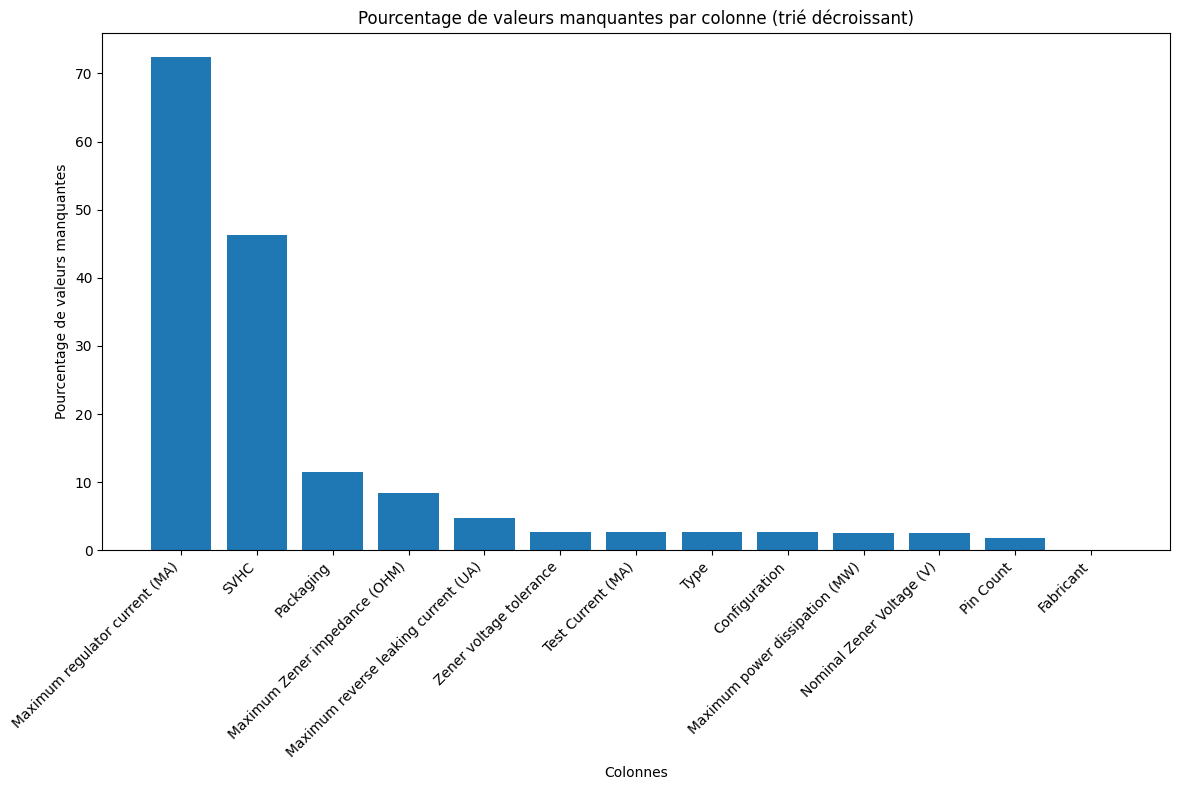

In [13]:
# Dictionnaire des pourcentages de valeurs manquantes
data = { 
   'Fabricant': percentages[0],
   'Type': percentages[1],
   'Configuration': percentages[2],
   'Nominal Zener Voltage (V)': percentages[3],
   'Zener voltage tolerance': percentages[4],
   'Maximum power dissipation (MW)': percentages[5],
   'Test Current (MA)': percentages[6],
   'Maximum reverse leaking current (UA)': percentages[7],
   'Maximum regulator current (MA)': percentages[8],
   'Maximum Zener impedance (OHM)': percentages[9],
   'Packaging': percentages[10],
   'Pin Count': percentages[11],
   'SVHC': percentages[12]
}

# Trier les données en ordre décroissant en fonction des valeurs
sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

# Création du graphique en barres VERTICALES (bar au lieu de barh)
plt.figure(figsize=(12, 8))
plt.bar(list(sorted_data.keys()), list(sorted_data.values()))  # Utilisation de plt.bar pour vertical

# Ajout des labels et du titre
plt.ylabel('Pourcentage de valeurs manquantes')
plt.xlabel('Colonnes')
plt.title('Pourcentage de valeurs manquantes par colonne (trié décroissant)')

# Rotation des étiquettes pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajustement automatique de la disposition
plt.tight_layout()

# Affichage du graphique
plt.show()

Les colonnes Maximum power dissipation (MW) (un des inputs) et SVHC(la colonne target) sont à étudier car ces deux colonnes sont peu remplies (respectivement 72% et 45% de données manquantes) 

## 4) Nettoyage et Prétaitement des données

In [14]:
df_svhc = df[df['SVHC'] == 1] # Filtrage des données avec SVHC = 1 (présence de substances dangereuses)
df_Nan =  df[df['SVHC'].isna()] # Filtrage des données avec SVHC = NaN (données manquantes)
df_nvhc = df[df['SVHC'] == 0] # Filtrage des données avec SVHC = 0 (absence de substances dangereuses)

In [15]:
df_svhc.shape # Dimension du jeu de données avec SVHC = 1  (présence de substances dangereuses)

(1497, 15)

In [16]:
df_nvhc.shape # Dimension du jeu de données avec SVHC = 0 (absence de substances dangereuses)

(2574, 15)

In [17]:
df_Nan.shape # Dimension du jeu de données avec SVHC = NaN (données manquantes)

(3509, 15)

In [18]:
df_train = pd.concat([df_svhc, df_nvhc]) # Concaténation des données avec SVHC = 1 et SVHC = 0

In [19]:
df_train.head() # Affichage des premières lignes du jeu de données d'entraînement


,Reference ZENER,Stock,Fabricant,Type,Configuration,0minal Zener Voltage (V),Zener volatge tolerance,Maximum power dissipation (MW),Test Current (MA),Maximum reverse leaking current (UA),Maximum regulator current (MA),Maximum Zener impedance (OHM),Packaging,Pin Count,SVHC
2,BZX8850S-C1V8YL Zener Diode S1 1.8V 5% 100Ohm ...,NaN,11,V,S1,1.8,5%,365.0,0.05,7.5,NaN,100,7.0,2.0,1.0
4,JANTX1N4614 (DO35) Zener Diode S1 1.8V 5% 1200...,NaN,10,V,S1,1.8,5%,400.0,0.25,7.5,120,1200,2.0,2.0,1.0
32,BZX8850S-C2V0YL Zener Diode S1 2V 5% 100Ohm 36...,NaN,11,V,S1,2.0,5%,365.0,0.05,7.0,NaN,100,7.0,2.0,1.0
33,CD0603-Z2 Zener Diode S1 2V 5% 100Ohm 150mW 2-...,NaN,2,V,S1,2.0,5%,150.0,5.00,100.0,NaN,100,7.0,2.0,1.0
34,CD0603-Z2 Zener Diode S1 2V 5% 100Ohm 150mW 2-...,NaN,2,V,S1,2.0,5%,150.0,5.00,100.0,NaN,100,7.0,2.0,1.0


La référence Zener étant uniquement une description de certaines caractéristiques de la diode, la colonne Réference n'est pas utile pour la prédiction

In [20]:
df_train_ss_ref = df_train.drop(columns=['Reference ZENER']) # Suppression de la colonne "Reference ZENER"

### Modification des colonnes ayant des données mixtes 

#### Pour analyser nos données et faire de la prédictions, nous avons besoin d'avoir tout nos inputs de forme numérique

Dans la colonne "Maximum regulator current (MA)" on a des valeurs de ce type 56@Ta=50C ce qui signifique que le Maximum regulator current est 56 Ma pour une température ambiante de  50°C. On doit prendre que le Ma. Mais on va supprimer la colonne "Maximum regulator current (MA)".

In [21]:
# Fonction pour extraire la valeur avant '@' ou laisser la valeur d'origine si '@' n'est pas présent
def extract_current_before_at(value):
    if isinstance(value, str) and "@" in value:
        return float(value.split('@')[0])  # Extrait la partie avant '@' comme un float
    return value  # Retourne la valeur d'origine (par ex. : 9.2)

# Fonction pour extraire la température après '@'
def extract_temperature_after_at(value):
    if isinstance(value, str) and "@" in value:
        temp_part = value.split('@')[1].strip()  # Extrait la partie après '@'
        if "=" in temp_part and "C" in temp_part:
            try:
                return float(temp_part.split('=')[1].replace('C', '').strip())  # Extrait la température entre '=' et 'C'
            except ValueError:
                return None  # Retourne None en cas d'erreur
    return None  # Retourne None si '@' n'est pas présent

In [22]:
#test
# Cas de test
print(extract_temperature_after_at("83@Ta=50C"))  # Résultat attendu : 50
print(extract_temperature_after_at("162@Ta=25C"))  # Résultat attendu : 25
print(extract_temperature_after_at("83 @Ta=50C"))  # Résultat attendu : 50 (avec un espace avant @)
print(extract_current_before_at("50"))  # Résultat attendu : 50 (avec un espace après @)


50.0
25.0
50.0
50


In [23]:
# Création de la colonne pour la température ambiante avant de modifier la colonne originale
df_train_ss_ref["Maximum Regulator Current Ambient Temperature (°C)"] = df_train_ss_ref["Maximum regulator current (MA)"].apply(extract_temperature_after_at)

# Mise à jour de la colonne "Maximum regulator current (MA)" pour ne garder que les valeurs avant '@'
df_train_ss_ref["Maximum regulator current (MA)"] = df_train_ss_ref["Maximum regulator current (MA)"].apply(extract_current_before_at)

In [24]:
# Réorganiser les colonnes pour placer "Maximum Regulator Current Ambient Temperature (°C)" après "Maximum regulator current (MA)"
columns = list(df_train_ss_ref.columns)
index = columns.index("Maximum regulator current (MA)")
columns.insert(index + 1, columns.pop(columns.index("Maximum Regulator Current Ambient Temperature (°C)")))
df_train_ss_ref = df_train_ss_ref[columns]

In [25]:
df_train_ss_ref.head()

,Stock,Fabricant,Type,Configuration,0minal Zener Voltage (V),Zener volatge tolerance,Maximum power dissipation (MW),Test Current (MA),Maximum reverse leaking current (UA),Maximum regulator current (MA),Maximum Regulator Current Ambient Temperature (°C),Maximum Zener impedance (OHM),Packaging,Pin Count,SVHC
2,NaN,11,V,S1,1.8,5%,365.0,0.05,7.5,NaN,NaN,100,7.0,2.0,1.0
4,NaN,10,V,S1,1.8,5%,400.0,0.25,7.5,120,NaN,1200,2.0,2.0,1.0
32,NaN,11,V,S1,2.0,5%,365.0,0.05,7.0,NaN,NaN,100,7.0,2.0,1.0
33,NaN,2,V,S1,2.0,5%,150.0,5.00,100.0,NaN,NaN,100,7.0,2.0,1.0
34,NaN,2,V,S1,2.0,5%,150.0,5.00,100.0,NaN,NaN,100,7.0,2.0,1.0


Dans la colonne colonne Maximum Zener impedance (OHM), on va enlever les TYP sur les données. Des données de la forme 50(Typ) vont devenir 50. 

In [26]:
# extraire les valeurs avant Typ dans la colonne  Maximum Zener impedance (OHM)
def extract_current_before_typ(value):
    if isinstance(value, str) and "(Typ)" in value:
        return float(value.split('(Typ)')[0])  # Extrait la partie avant '(Typ)' comme un float
    return value  # Retourne la valeur d'origine (par ex. : 9.2)


In [27]:
# test 
print(extract_current_before_typ("50(Typ)"))  # Résultat attendu : 50

50.0


In [28]:
df_train_ss_ref["Maximum Zener impedance (OHM)"] = df_train_ss_ref["Maximum Zener impedance (OHM)"].apply(extract_current_before_typ)

df_train_ss_ref["Maximum Zener impedance (OHM)"].unique()

array(['100', '1200', '85', '30', '83', '95', '29', '10', '28', '24', '9',
       '8', '90', '23', '2', '7.5', '15', 23.0, '22', '6', '7', '80',
       22.0, '19', '5', '1550', '78', '60', 19.0, '17', '1.5', nan, '3.5',
       '50', '70', '4', 17.0, '40', '11', '1', '2.5', '25', 11.0, '3',
       '20', 5.0, 6.0, '4.5', '2.3', 8.0, 10.0, '5.5', '6.5', 30.0, '26',
       '13', '14', '16', '32', '36', '12', '45', '42', '55', '58', '17.5',
       '35', '33', '62', 41.0, '44', '49', '65', '88', '75', '38', '130',
       '93', '53', '150', '67', '170', '125', '48', '180', '200', '110',
       '86', '215', '240', '120', '175', '140', '255', '270', '115',
       '400', '250', '350', '750', '450', '300', '225', '380', '190',
       '700', '375', '475', '330', '600', '575', '1000', '550', '1100',
       '625', '650', '430', '900', '800', '480', '500', '1900', '875',
       '1500', '1600', '1050', '2000', '2100', '2300', '2500', '1400',
       '1650', '1700', '21', '10.5', '8.5', '6.6', '5.2', '1

On va transformer les % de la colonne Zener voltage tolerance

In [29]:
df_train_ss_ref['Zener volatge tolerance'] = df_train_ss_ref['Zener volatge tolerance'].str.replace('%', '').astype(float) / 100

In [30]:
df_train_ss_ref['Zener volatge tolerance'].unique()

array([0.05  , 0.08  , 0.02  , 0.07  , 0.06  , 0.1   , 0.03  , 0.2   ,
          nan, 0.04  , 0.025 , 0.0395, 0.0256, 0.0588, 0.01  , 0.061 ,
       0.0545, 0.0253, 0.0567, 0.0704, 0.0513])

Transformer les données catégorielles en données numériques de Maximum regulator current (MA) et de  Maximum Zener impedance (OHM)  

Tout d'abord nous allons Transformer les données catégorielles en données numériques de Maximum regulator current (MA)

In [31]:
df_train_ss_ref['Maximum regulator current (MA)'].unique()

array([nan, '120', '454', 252.0, '417', '416', 234.0, '1220', '384',
       '468', '768', 217.0, '1100', '348', '1010', '319', '164', '638',
       '930', 356.0, '520', '356', '588', '196', '865', '267', '432.3',
       '268', 324.0, '480', '179', '324', '790', 146.0, '241', '242',
       292.0, '435', '61', '482', '161', '220', '221', '55', '440', '147',
       '266', '393', '200', '133', '580', '182', 220.0, '45', '122',
       '270.6', '297', '110', '475', '150', '100', '270', 83.0, '430',
       '136', '125', 152.0, '83', '365', '115', '208', '98', '340', '315',
       '180', '132', '67', '169', '93', '114', 50.0, '264', 100.0, '56',
       '70', '75', '90', '50', '68', 82.0, '123', '198', '62', '63', '76',
       '42', '51', '190', '37', '46', '158', '33', '30', '38', '41', '28',
       '69', '26', '31', '34', '32', '29', 36.0, '36', '24', '48', '27',
       '20', '40', '18', 11.0, '58', '52.5', 20.0, 9.0, '47.5', '15',
       '43', '8.6', '25', '12', '22', '36.6', '11', '7', '21'

In [32]:
df_train_ss_ref['Maximum regulator current (MA)'] = pd.to_numeric(
    df_train_ss_ref['Maximum regulator current (MA)'], errors='coerce'
)
df_train_ss_ref['Maximum regulator current (MA)'].unique()

array([   nan,  120. ,  454. ,  252. ,  417. ,  416. ,  234. , 1220. ,
        384. ,  468. ,  768. ,  217. , 1100. ,  348. , 1010. ,  319. ,
        164. ,  638. ,  930. ,  356. ,  520. ,  588. ,  196. ,  865. ,
        267. ,  432.3,  268. ,  324. ,  480. ,  179. ,  790. ,  146. ,
        241. ,  242. ,  292. ,  435. ,   61. ,  482. ,  161. ,  220. ,
        221. ,   55. ,  440. ,  147. ,  266. ,  393. ,  200. ,  133. ,
        580. ,  182. ,   45. ,  122. ,  270.6,  297. ,  110. ,  475. ,
        150. ,  100. ,  270. ,   83. ,  430. ,  136. ,  125. ,  152. ,
        365. ,  115. ,  208. ,   98. ,  340. ,  315. ,  180. ,  132. ,
         67. ,  169. ,   93. ,  114. ,   50. ,  264. ,   56. ,   70. ,
         75. ,   90. ,   68. ,   82. ,  123. ,  198. ,   62. ,   63. ,
         76. ,   42. ,   51. ,  190. ,   37. ,   46. ,  158. ,   33. ,
         30. ,   38. ,   41. ,   28. ,   69. ,   26. ,   31. ,   34. ,
         32. ,   29. ,   36. ,   24. ,   48. ,   27. ,   20. ,   40. ,
      

Maintenant nous allons transformer les données catégorielles en données numériques de Maximum Zener impedance (OHM)

In [33]:
df_train_ss_ref['Maximum Zener impedance (OHM)'] = pd.to_numeric(
    df_train_ss_ref['Maximum Zener impedance (OHM)'], errors='coerce'
)
df_train_ss_ref['Maximum Zener impedance (OHM)'].unique()

array([1.00e+02, 1.20e+03, 8.50e+01, 3.00e+01, 8.30e+01, 9.50e+01,
       2.90e+01, 1.00e+01, 2.80e+01, 2.40e+01, 9.00e+00, 8.00e+00,
       9.00e+01, 2.30e+01, 2.00e+00, 7.50e+00, 1.50e+01, 2.20e+01,
       6.00e+00, 7.00e+00, 8.00e+01, 1.90e+01, 5.00e+00, 1.55e+03,
       7.80e+01, 6.00e+01, 1.70e+01, 1.50e+00,      nan, 3.50e+00,
       5.00e+01, 7.00e+01, 4.00e+00, 4.00e+01, 1.10e+01, 1.00e+00,
       2.50e+00, 2.50e+01, 3.00e+00, 2.00e+01, 4.50e+00, 2.30e+00,
       5.50e+00, 6.50e+00, 2.60e+01, 1.30e+01, 1.40e+01, 1.60e+01,
       3.20e+01, 3.60e+01, 1.20e+01, 4.50e+01, 4.20e+01, 5.50e+01,
       5.80e+01, 1.75e+01, 3.50e+01, 3.30e+01, 6.20e+01, 4.10e+01,
       4.40e+01, 4.90e+01, 6.50e+01, 8.80e+01, 7.50e+01, 3.80e+01,
       1.30e+02, 9.30e+01, 5.30e+01, 1.50e+02, 6.70e+01, 1.70e+02,
       1.25e+02, 4.80e+01, 1.80e+02, 2.00e+02, 1.10e+02, 8.60e+01,
       2.15e+02, 2.40e+02, 1.20e+02, 1.75e+02, 1.40e+02, 2.55e+02,
       2.70e+02, 1.15e+02, 4.00e+02, 2.50e+02, 3.50e+02, 7.50e

On va créer un nouveau csv pour vérifier que les données ont bien été traitées

In [34]:
# Sauvegarder le fichier mis à jour
updated_file_path_2 = 'C:/Users/scoup/Downloads/updated_arrow_data_lv_with_temperature.csv'
df_train_ss_ref.to_csv(updated_file_path_2, index=False)
updated_file_path_2

'C:/Users/scoup/Downloads/updated_arrow_data_lv_with_temperature.csv'

In [35]:
df_train_ss_ref.head()

,Stock,Fabricant,Type,Configuration,0minal Zener Voltage (V),Zener volatge tolerance,Maximum power dissipation (MW),Test Current (MA),Maximum reverse leaking current (UA),Maximum regulator current (MA),Maximum Regulator Current Ambient Temperature (°C),Maximum Zener impedance (OHM),Packaging,Pin Count,SVHC
2,NaN,11,V,S1,1.8,0.05,365.0,0.05,7.5,NaN,NaN,100.0,7.0,2.0,1.0
4,NaN,10,V,S1,1.8,0.05,400.0,0.25,7.5,120.0,NaN,1200.0,2.0,2.0,1.0
32,NaN,11,V,S1,2.0,0.05,365.0,0.05,7.0,NaN,NaN,100.0,7.0,2.0,1.0
33,NaN,2,V,S1,2.0,0.05,150.0,5.00,100.0,NaN,NaN,100.0,7.0,2.0,1.0
34,NaN,2,V,S1,2.0,0.05,150.0,5.00,100.0,NaN,NaN,100.0,7.0,2.0,1.0


In [36]:
df_train_ss_ref["Maximum Zener impedance (OHM)"].unique()

array([1.00e+02, 1.20e+03, 8.50e+01, 3.00e+01, 8.30e+01, 9.50e+01,
       2.90e+01, 1.00e+01, 2.80e+01, 2.40e+01, 9.00e+00, 8.00e+00,
       9.00e+01, 2.30e+01, 2.00e+00, 7.50e+00, 1.50e+01, 2.20e+01,
       6.00e+00, 7.00e+00, 8.00e+01, 1.90e+01, 5.00e+00, 1.55e+03,
       7.80e+01, 6.00e+01, 1.70e+01, 1.50e+00,      nan, 3.50e+00,
       5.00e+01, 7.00e+01, 4.00e+00, 4.00e+01, 1.10e+01, 1.00e+00,
       2.50e+00, 2.50e+01, 3.00e+00, 2.00e+01, 4.50e+00, 2.30e+00,
       5.50e+00, 6.50e+00, 2.60e+01, 1.30e+01, 1.40e+01, 1.60e+01,
       3.20e+01, 3.60e+01, 1.20e+01, 4.50e+01, 4.20e+01, 5.50e+01,
       5.80e+01, 1.75e+01, 3.50e+01, 3.30e+01, 6.20e+01, 4.10e+01,
       4.40e+01, 4.90e+01, 6.50e+01, 8.80e+01, 7.50e+01, 3.80e+01,
       1.30e+02, 9.30e+01, 5.30e+01, 1.50e+02, 6.70e+01, 1.70e+02,
       1.25e+02, 4.80e+01, 1.80e+02, 2.00e+02, 1.10e+02, 8.60e+01,
       2.15e+02, 2.40e+02, 1.20e+02, 1.75e+02, 1.40e+02, 2.55e+02,
       2.70e+02, 1.15e+02, 4.00e+02, 2.50e+02, 3.50e+02, 7.50e

In [37]:
print(df_train_ss_ref.dtypes)


Stock                                                  object
Fabricant                                               int64
Type                                                   object
Configuration                                          object
0minal Zener Voltage (V)                              float64
Zener volatge tolerance                               float64
Maximum power dissipation (MW)                        float64
Test Current (MA)                                     float64
Maximum reverse leaking current (UA)                  float64
Maximum regulator current (MA)                        float64
Maximum Regulator Current Ambient Temperature (°C)    float64
Maximum Zener impedance (OHM)                         float64
Packaging                                             float64
Pin Count                                             float64
SVHC                                                  float64
dtype: object


### Analyse de la distribution des variables

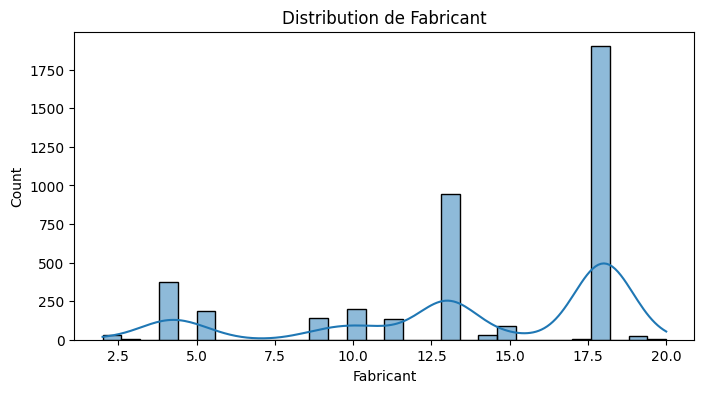

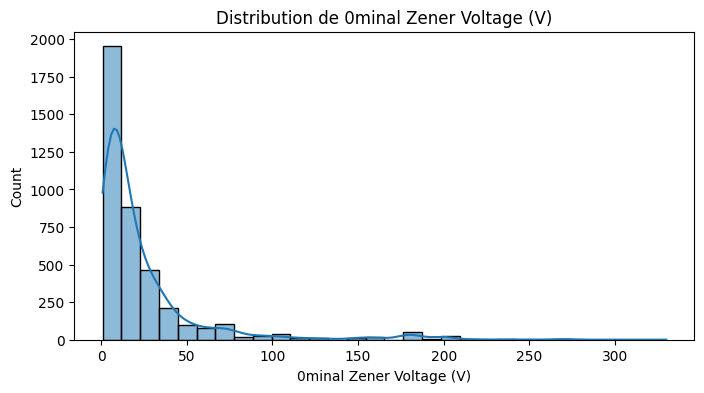

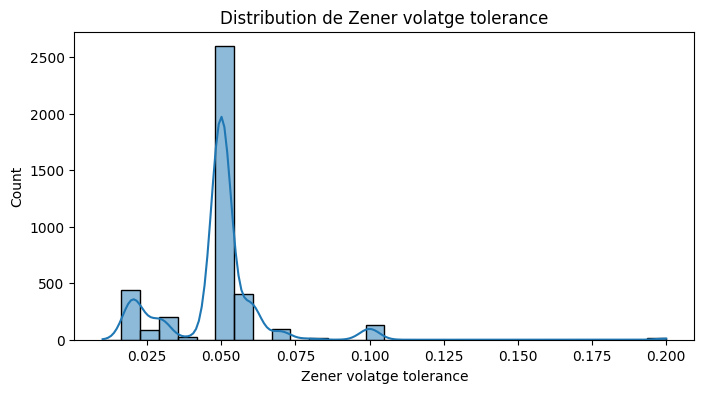

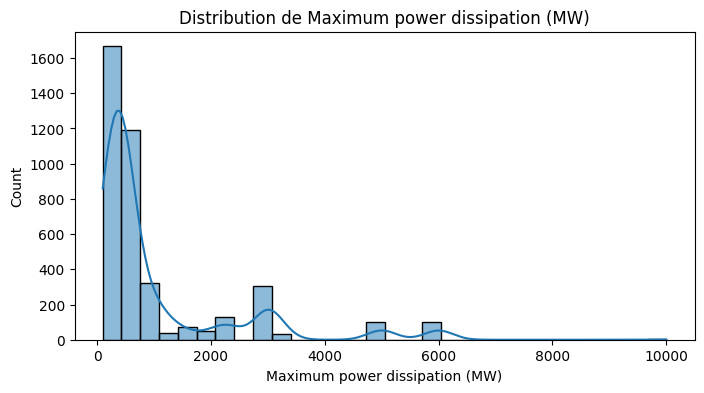

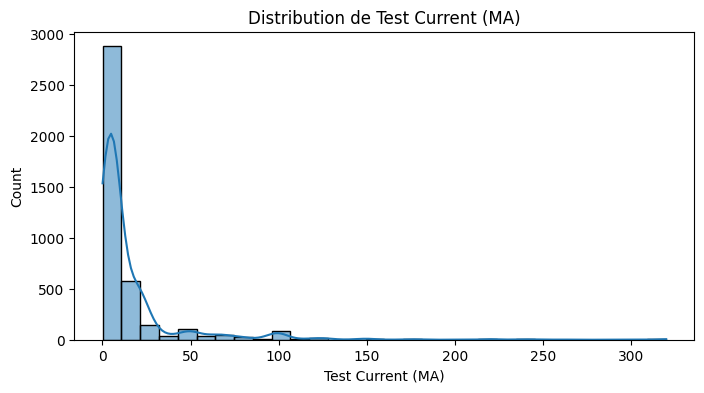

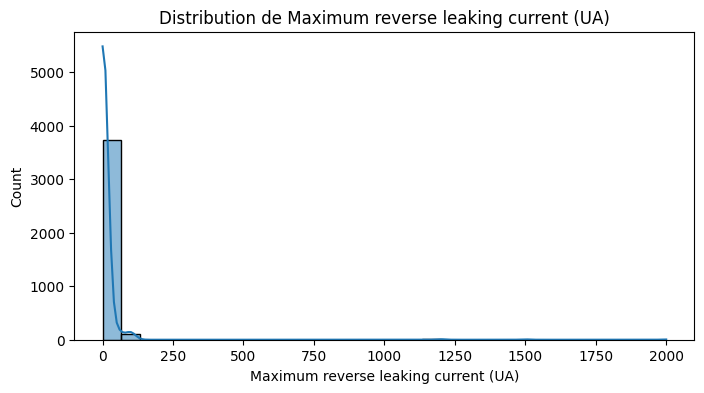

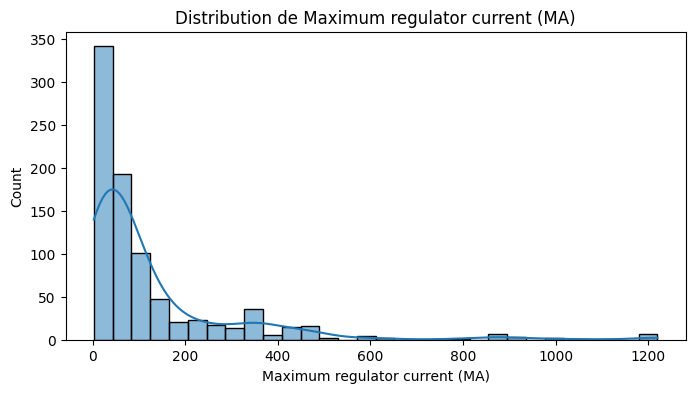

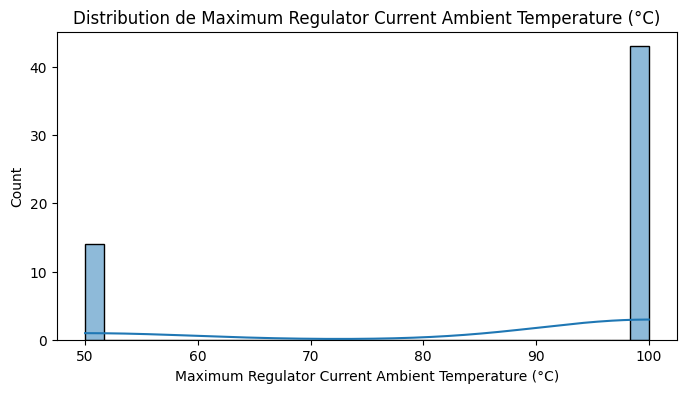

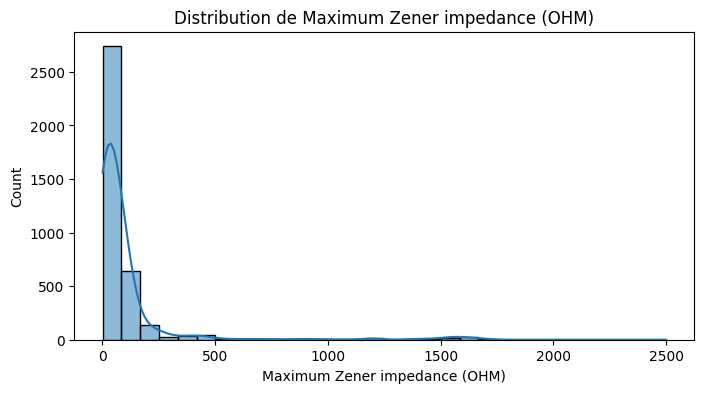

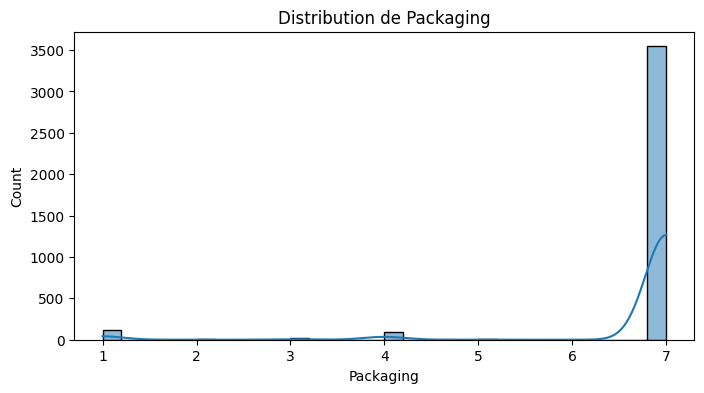

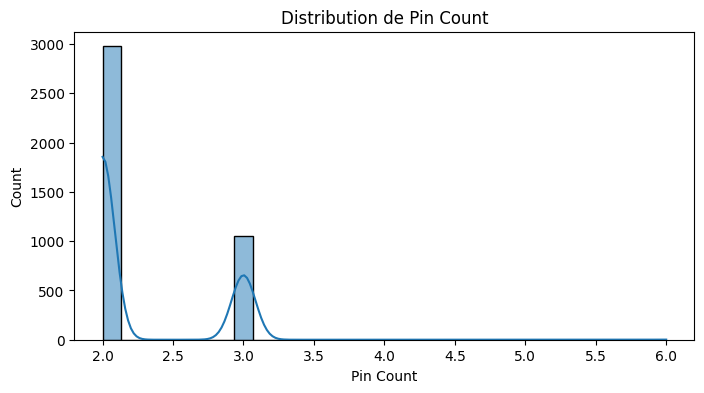

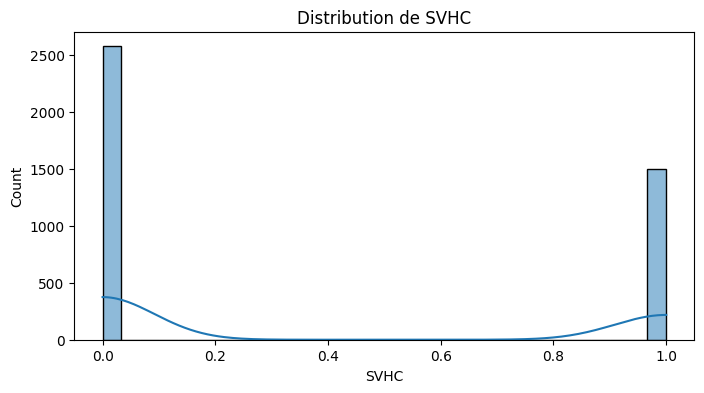

In [38]:
# Sélection des colonnes numériques
num_cols = df_train_ss_ref.select_dtypes(include=['float64', 'int64']).columns
# Création de plusieurs histogrammes
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train_ss_ref[col], bins=30, kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()


### Détection des outliers

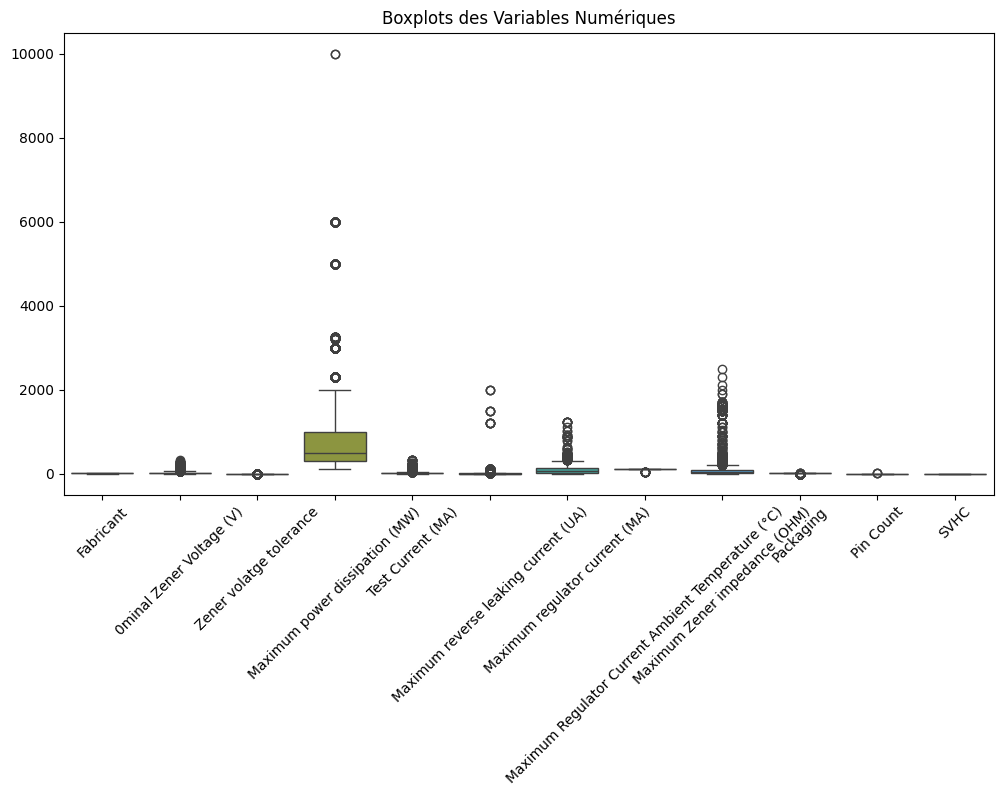

In [39]:
# Sélection des colonnes numériques uniquement
num_cols = df_train_ss_ref.select_dtypes(include=['float64', 'int64']).columns

# Tracer les boxplots des variables numériques
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train_ss_ref[num_cols])
plt.xticks(rotation=45)  # Rotation des labels pour une meilleure lisibilité
plt.title("Boxplots des Variables Numériques")
plt.show()


### Suppression des outliers avec IQR

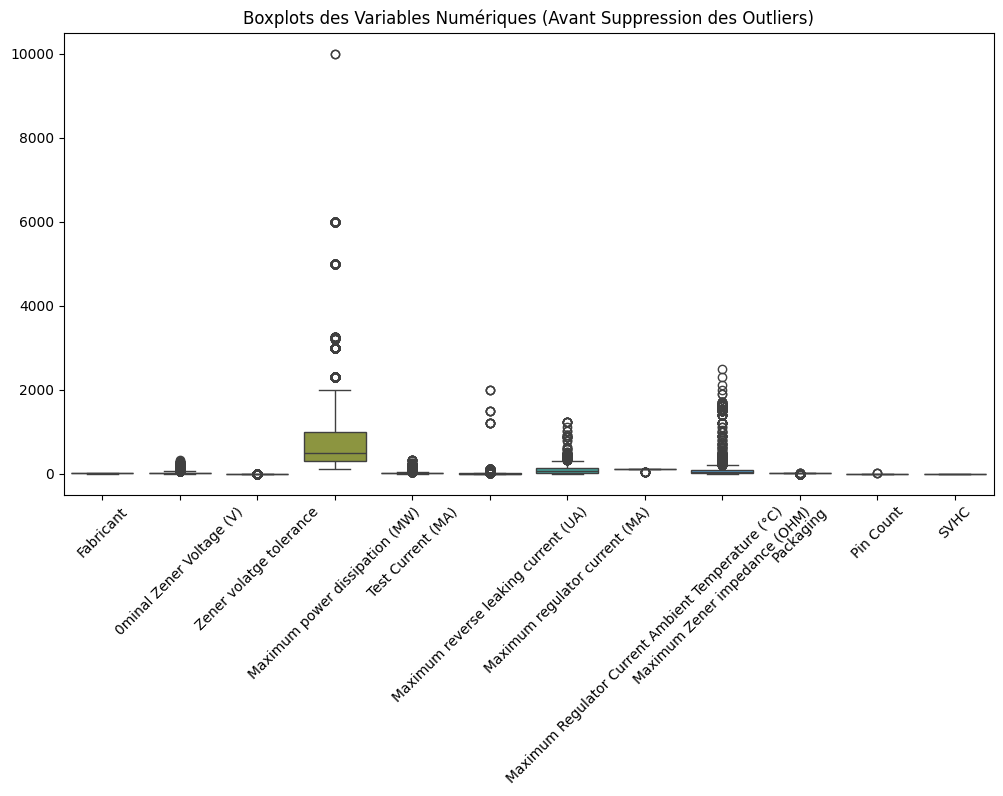

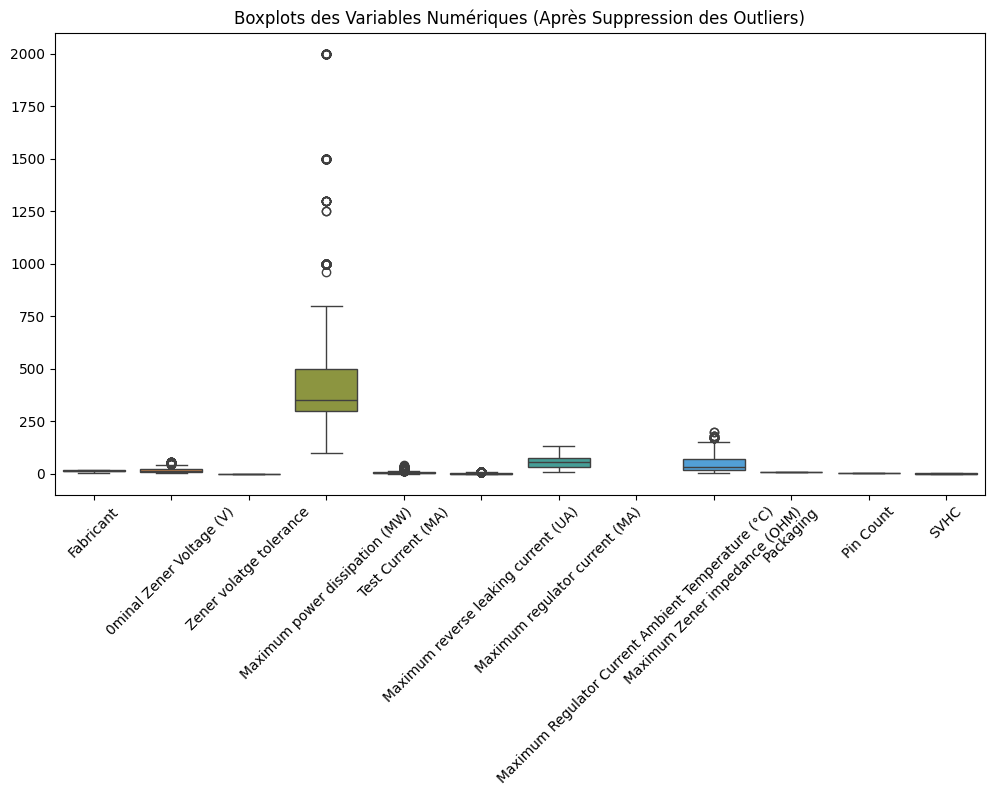

In [40]:
# Sélection des colonnes numériques uniquement
num_cols = df_train_ss_ref.select_dtypes(include=['float64', 'int64']).columns

# Tracer les boxplots avant suppression des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train_ss_ref[num_cols])
plt.xticks(rotation=45)  # Rotation des labels
plt.title("Boxplots des Variables Numériques (Avant Suppression des Outliers)")
plt.show()

# Suppression des outliers avec la méthode IQR
Q1 = df_train_ss_ref[num_cols].quantile(0.25)
Q3 = df_train_ss_ref[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtrer les valeurs comprises entre [Q1 - 1.5 * IQR] et [Q3 + 1.5 * IQR]
df_clean = df_train_ss_ref[np.logical_not(
    ((df_train_ss_ref[num_cols] < (Q1 - 1.5 * IQR)) | 
     (df_train_ss_ref[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
)]


# Tracer les boxplots après suppression des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplots des Variables Numériques (Après Suppression des Outliers)")
plt.show()



### Analyse des relations entre les variables

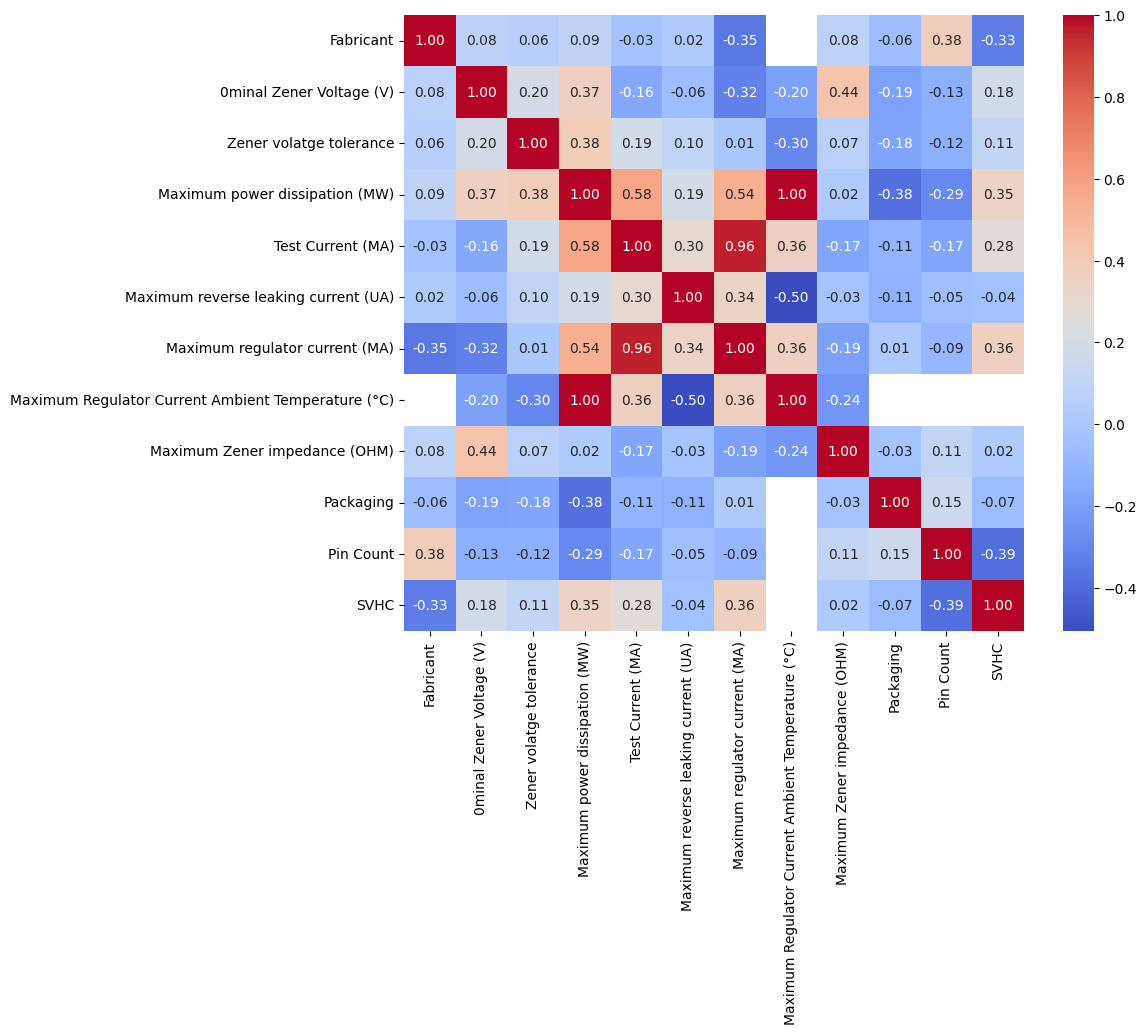

In [41]:
# Sélection des colonnes numériques uniquement
num_cols = df_train_ss_ref.select_dtypes(include=['float64', 'int64']).columns

# Tracer heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df_train_ss_ref[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()



On peut voir un lien proportionnelle ou quasi proportionnelle entre les Maximum power dissipation (MW) et Maximum Regulator Current Ambient Temperature (°C) et entre Maximum regulator current (MA) et Test Current (MA)

#### Relation entre Maximum regulator current (MA)et Test Current (MA)

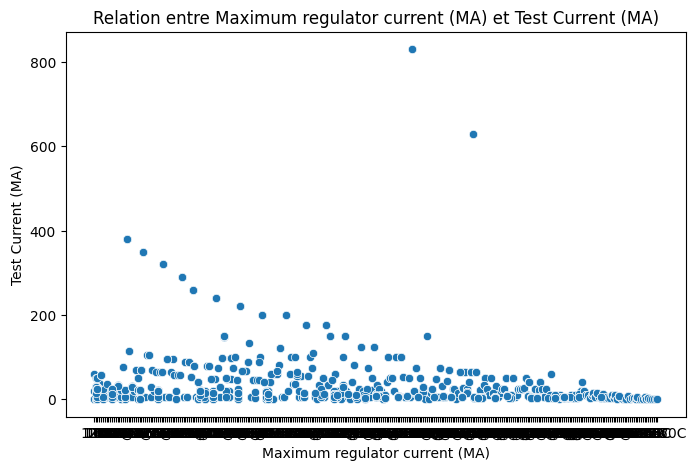

In [42]:
# Liste des paires de variables à analyser
var_pairs = [("Maximum regulator current (MA)", "Test Current (MA)")]

for x_var, y_var in var_pairs:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[x_var], y=df[y_var])
    plt.title(f"Relation entre {x_var} et {y_var}")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.show()

En voyant le nuage de points, on ne peut rien en conclure.

# PCA pour voir les principales composantes

## Peut être encoder de manière numérique les colonnes Type et Configuration  

In [43]:
print(df_train_ss_ref.columns.tolist())

['Stock', 'Fabricant', 'Type', 'Configuration', '0minal Zener Voltage (V)', 'Zener volatge tolerance', 'Maximum power dissipation (MW)', 'Test Current (MA)', 'Maximum reverse leaking current (UA)', 'Maximum regulator current (MA)', 'Maximum Regulator Current Ambient Temperature (°C)', 'Maximum Zener impedance (OHM)', 'Packaging', 'Pin Count', 'SVHC']


In [44]:

# Supposons que les colonnes sont nommées "a", "b", ..., "p"
columns = list(df_train_ss_ref.columns)

# Sélection des colonnes de la 5e à l'avant-dernière, sans prendre la 3e et 4e
selected_columns = columns[1:2] + columns[4:-1]  # Exclut la 3e et 4e colonnes
print("Colonnes sélectionnées pour la PCA :", selected_columns)

# Filtrer le DataFrame pour ne garder que les colonnes sélectionnées
df_selected = df_train_ss_ref[selected_columns]

len(df_selected)

Colonnes sélectionnées pour la PCA : ['Fabricant', '0minal Zener Voltage (V)', 'Zener volatge tolerance', 'Maximum power dissipation (MW)', 'Test Current (MA)', 'Maximum reverse leaking current (UA)', 'Maximum regulator current (MA)', 'Maximum Regulator Current Ambient Temperature (°C)', 'Maximum Zener impedance (OHM)', 'Packaging', 'Pin Count']


4071

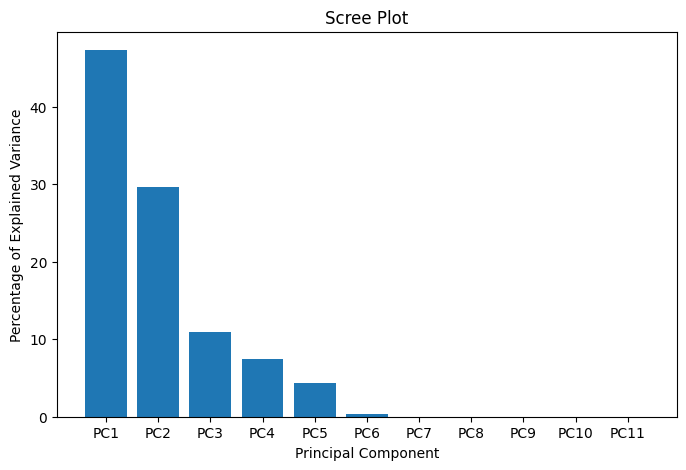

In [45]:
# Supprimer les lignes contenant des NaN dans les colonnes sélectionnées
df_selected_ss_na = df_selected.dropna()

# Standardiser les données (nécessaire pour la PCA)
df_selected_ss_na_scaled = StandardScaler().fit_transform(df_selected_ss_na)

# Effectuer la PCA
pca_full = PCA()
pca_full.fit(df_selected_ss_na_scaled)

plt.figure(figsize=(8,5))
per_var = np.round(pca_full.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [46]:
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
print(f"Variance expliquée par PC1+PC2: {cumulative_variance[1]:.2%}")
print(f"Variance expliquée par PC1+PC2+PC3: {cumulative_variance[2]:.2%}")
print(f"Variance expliquée par PC1+PC2+PC3+PC4: {cumulative_variance[3]:.2%}")

Variance expliquée par PC1+PC2: 76.93%
Variance expliquée par PC1+PC2+PC3: 87.78%
Variance expliquée par PC1+PC2+PC3+PC4: 95.25%


ON va prendre les deux premières composantes

In [47]:
# Appliquer PCA pour obtenir PC1 et PC2
pca = PCA(n_components=2)  # On ne garde que les 2 premières composantes
principal_components = pca.fit_transform(df_selected_ss_na_scaled)  # Transformer les données

# Créer un DataFrame avec PC1 et PC2
principalDf = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Ajouter la colonne target si elle existe dans df_selected
if 'target' in df_selected.columns:
    principalDf['target'] = df_selected_ss_na['target'].values

# Afficher le DataFrame résultant
print(principalDf)


         PC1       PC2
0  -0.962898  4.588855
1  -0.962898  4.588855
2  -0.962898  4.588855
3  -0.957255  3.357333
4  -0.989067  2.355787
5   1.748558 -0.071336
6   1.748558 -0.071336
7   1.748558 -0.071336
8   1.748558 -0.071336
9   1.748558 -0.071336
10  1.748558 -0.071336
11  1.748558 -0.071336
12  1.748558 -0.071336
13  1.748558 -0.071336
14  1.748558 -0.071336
15  1.748558 -0.071336
16  1.748558 -0.071336
17  1.748558 -0.071336
18  1.748558 -0.071336
19  1.748558 -0.071336
20  1.748558 -0.071336
21  1.748558 -0.071336
22  1.748558 -0.071336
23  1.541843 -0.163923
24  1.541843 -0.163923
25  1.541843 -0.163923
26  1.328074 -0.259767
27  0.483472  0.728808
28  0.483472  0.728808
29  0.483472  0.728808
30 -0.066706 -1.007612
31 -0.066706 -1.007612
32 -0.066706 -1.007612
33 -0.066706 -1.007612
34 -0.066706 -1.007612
35 -0.066706 -1.007612
36 -0.066706 -1.007612
37 -0.066706 -1.007612
38 -0.066706 -1.007612
39 -0.236149 -1.088651
40 -0.236149 -1.088651
41 -0.982148 -1.461955
42 -3.65251

Text(0, 0.5, 'PC2 - 29.6%')

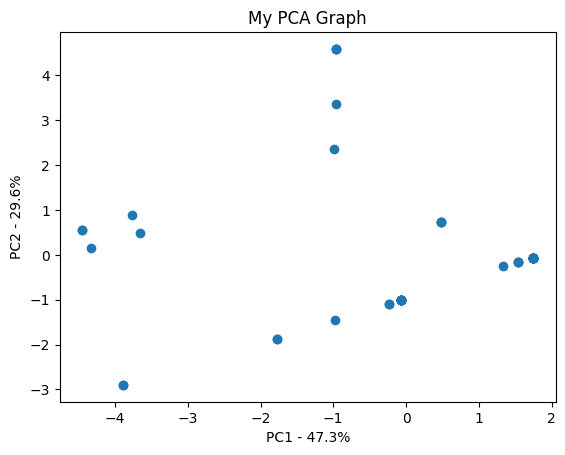

In [48]:
#the following code makes a fancy looking plot using PC1 and PC2 

plt.scatter(principalDf.PC1, principalDf.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 

In [49]:
# Obtenir les charges (importance des colonnes dans les composantes principales)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['Principal Component 1', 'Principal Component 2'],
    index=selected_columns
)

print("Charges des colonnes dans les composantes principales :")
print(loadings)

Charges des colonnes dans les composantes principales :
                                                    Principal Component 1  \
Fabricant                                                       -0.000000   
0minal Zener Voltage (V)                                        -0.443757   
Zener volatge tolerance                                         -0.089914   
Maximum power dissipation (MW)                                   0.332808   
Test Current (MA)                                                0.445224   
Maximum reverse leaking current (UA)                            -0.057914   
Maximum regulator current (MA)                                   0.444105   
Maximum Regulator Current Ambient Temperature (°C)               0.332808   
Maximum Zener impedance (OHM)                                   -0.417930   
Packaging                                                       -0.000000   
Pin Count                                                       -0.000000   

                   

In [50]:
# Identifier les colonnes les plus importantes pour la première composante principale
important_columns_pc1 = loadings['Principal Component 1'].abs().sort_values(ascending=False)
top_5_colonness = important_columns_pc1[0:5].index.values
print("les 5 Colonnes les plus importantes pour la première composante principale :")
print(important_columns_pc1[top_5_colonness])

les 5 Colonnes les plus importantes pour la première composante principale :
Test Current (MA)                 0.445224
Maximum regulator current (MA)    0.444105
0minal Zener Voltage (V)          0.443757
Maximum Zener impedance (OHM)     0.417930
Maximum power dissipation (MW)    0.332808
Name: Principal Component 1, dtype: float64


In [51]:
# Identifier les colonnes les plus importantes pour la première composante principale
important_columns_pc2 = loadings['Principal Component 2'].abs().sort_values(ascending=False)
top_5_colonness = important_columns_pc2[0:5].index.values
print("Colonnes les plus importantes pour la première composante principale :")
print(important_columns_pc2[top_5_colonness])

Colonnes les plus importantes pour la première composante principale :
Maximum reverse leaking current (UA)                  0.553318
Maximum Regulator Current Ambient Temperature (°C)    0.460271
Maximum power dissipation (MW)                        0.460271
Zener volatge tolerance                               0.305569
0minal Zener Voltage (V)                              0.252424
Name: Principal Component 2, dtype: float64


In [52]:
print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)
print("Variance totale expliquée :", sum(pca.explained_variance_ratio_))


Variance expliquée par chaque composante : [0.47278629 0.29647131]
Variance totale expliquée : 0.7692575933839365


### Les colonnes Fabricant, Packaging et Pin Count ne sont pas importantes car elles ont une variance de 0 dans PC1 et PC2

In [53]:
df_selected_ss_na
len(df_selected_ss_na)

51

In [54]:
# Colonnes à conserver
important_columns = [
    "Maximum power dissipation (MW)",
    "Maximum Regulator Current Ambient Temperature (°C)",
    "Test Current (MA)",
    "Maximum regulator current (MA)",
    "Maximum reverse leaking current (UA)",
    "0minal Zener Voltage (V)",
    "Maximum Zener impedance (OHM)"
]

# Filtrer le DataFrame et créer une copie explicite
df_final = df_train_ss_ref[important_columns].copy()
#Ajout de la colonne SVHC target 
df_final['SVHC'] = df_train_ss_ref['SVHC']
# Vérification des colonnes restantes
print("Colonnes restantes après réduction :", df_final.columns.tolist())

Colonnes restantes après réduction : ['Maximum power dissipation (MW)', 'Maximum Regulator Current Ambient Temperature (°C)', 'Test Current (MA)', 'Maximum regulator current (MA)', 'Maximum reverse leaking current (UA)', '0minal Zener Voltage (V)', 'Maximum Zener impedance (OHM)', 'SVHC']


In [55]:
df_final

,Maximum power dissipation (MW),Maximum Regulator Current Ambient Temperature (°C),Test Current (MA),Maximum regulator current (MA),Maximum reverse leaking current (UA),0minal Zener Voltage (V),Maximum Zener impedance (OHM),SVHC
2,365.0,NaN,0.05,NaN,7.5,1.8,100.0,1.0
4,400.0,NaN,0.25,120.0,7.5,1.8,1200.0,1.0
32,365.0,NaN,0.05,NaN,7.0,2.0,100.0,1.0
33,150.0,NaN,5.00,NaN,100.0,2.0,100.0,1.0
34,150.0,NaN,5.00,NaN,100.0,2.0,100.0,1.0
...,...,...,...,...,...,...,...,...
7561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


# Random Forest 


In [56]:


# Supposons que 'SVHC' soit la variable cible
X = df_final[important_columns]
y = df_final['SVHC']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest simple 

In [57]:
# Créer le modèle de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9116564417177914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       491
         1.0       0.91      0.86      0.89       324

    accuracy                           0.91       815
   macro avg       0.91      0.90      0.91       815
weighted avg       0.91      0.91      0.91       815



In [58]:
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


# Amélioration du random Forest

In [59]:
# Étape 1 : Création du modèle de Random Forest (avec hyperparamètres de base)
rf_model = RandomForestClassifier(random_state=42)

# Étape 2 : Validation croisée pour évaluer la robustesse du modèle
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Validation croisée (Accuracy moyenne) : {np.mean(cv_scores):.4f}")

# Étape 3 : Optimisation des hyperparamètres avec GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200,500,1000],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
best_params = grid_search.best_params_
print(f"Meilleurs hyperparamètres : {best_params}")

# Modèle optimisé
rf_best_model = grid_search.best_estimator_

# Étape 4 : Entraînement du modèle optimisé
rf_best_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = rf_best_model.predict(X_test)
y_pred_proba = rf_best_model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive

# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy sur le test : {accuracy:.4f}")
print(f"Rapport de classification :\n{report}")



Validation croisée (Accuracy moyenne) : 0.9048
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Meilleurs hyperparamètres : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy sur le test : 0.9129
Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       491
         1.0       0.91      0.86      0.89       324

    accuracy                           0.91       815
   macro avg       0.91      0.90      0.91       815
weighted avg       0.91      0.91      0.91       815



AUC-ROC Score : 0.9622


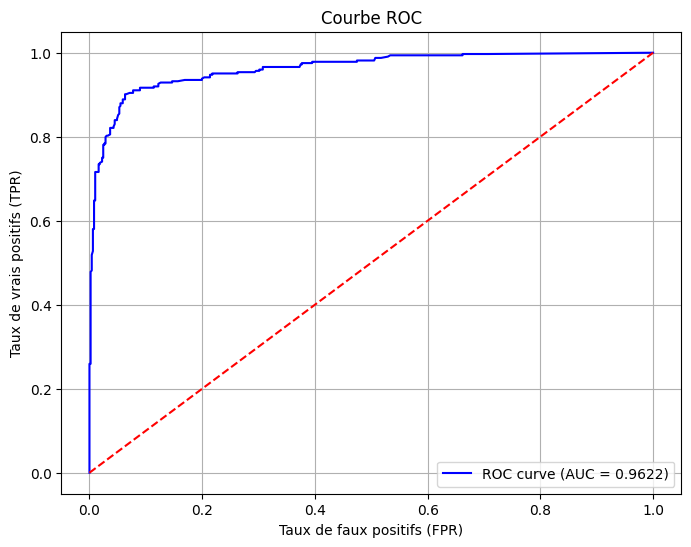

Importance des caractéristiques :
Maximum power dissipation (MW): 0.4873
0minal Zener Voltage (V): 0.1210
Maximum reverse leaking current (UA): 0.1180
Maximum Zener impedance (OHM): 0.1117
Test Current (MA): 0.1051
Maximum regulator current (MA): 0.0565
Maximum Regulator Current Ambient Temperature (°C): 0.0004


In [60]:
# Étape 5 : Courbe ROC et AUC
if len(np.unique(y)) == 2:  # Vérification si problème binaire
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    print(f"AUC-ROC Score : {auc_score:.4f}")

    # Tracer la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('Taux de faux positifs (FPR)')
    plt.ylabel('Taux de vrais positifs (TPR)')
    plt.title('Courbe ROC')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Étape 6 : Importance des caractéristiques
feature_importances = rf_best_model.feature_importances_
sorted_importances = sorted(zip(important_columns, feature_importances), key=lambda x: x[1], reverse=True)

print("Importance des caractéristiques :")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")

# Random Forest

In [61]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Supposons que 'SVHC' soit la variable cible
X = df_train.drop(columns=['SVHC'])
y = df_train['SVHC']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")'''


'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, classification_report\n\n# Supposons que \'SVHC\' soit la variable cible\nX = df_train.drop(columns=[\'SVHC\'])\ny = df_train[\'SVHC\']\n\n# Diviser les données en ensembles d\'entraînement et de test\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Créer le modèle de Random Forest\nrf_model = RandomForestClassifier(n_estimators=100, random_state=42)\n\n# Entraîner le modèle\nrf_model.fit(X_train, y_train)\n\n# Prédire sur l\'ensemble de test\ny_pred = rf_model.predict(X_test)\n\n# Évaluer le modèle\naccuracy = accuracy_score(y_test, y_pred)\nreport = classification_report(y_test, y_pred)\n\nprint(f"Accuracy: {accuracy}")\nprint(f"Classification Report:\n{report}")'